In [1]:
import pandas as pd
Phishing_Data = pd.read_csv("C:\\Users\\alfre_g2qn6y7\\OneDrive\\Documents\\dataset_phishing.csv")
Phishing_Data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [4]:
Phishing_Data.shape

(11430, 89)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
X = Phishing_Data.drop(["url","status"],axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(min_samples=88) 
cluster_labels = dbscan.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

Since only one cluster formed based on the dimensions rule, feature selection possibly needs to be done. Let's run only the top ten features based on the Week 9 Juypter NoteBook. 

In [16]:
X = Phishing_Data[["google_index","page_rank","nb_hyperlinks","nb_www","web_traffic","domain_age","nb_qm","phish_hints","longest_word_path","nb_hyphens"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(min_samples=11) 
cluster_labels = dbscan.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")


Silhouette Score: -0.138


Since this is a very bad silhoutte score, let's vary the epsilon parameter as shown below. 

In [17]:
import numpy as np
for e in np.linspace(0.5,10.1):
    dbscan = DBSCAN(eps=e,min_samples=11)
    cluster_labels = dbscan.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"Silhouette Score for epsilon ={e}: {silhouette_avg:.3f}")

Silhouette Score for epsilon =0.5: -0.138
Silhouette Score for epsilon =0.6959183673469388: -0.041
Silhouette Score for epsilon =0.8918367346938776: -0.005
Silhouette Score for epsilon =1.0877551020408163: -0.006
Silhouette Score for epsilon =1.2836734693877552: 0.163
Silhouette Score for epsilon =1.4795918367346939: 0.158
Silhouette Score for epsilon =1.6755102040816325: 0.173
Silhouette Score for epsilon =1.8714285714285714: 0.191
Silhouette Score for epsilon =2.0673469387755103: 0.246
Silhouette Score for epsilon =2.263265306122449: 0.248
Silhouette Score for epsilon =2.4591836734693877: 0.250
Silhouette Score for epsilon =2.6551020408163266: 0.252
Silhouette Score for epsilon =2.851020408163265: 0.558
Silhouette Score for epsilon =3.046938775510204: 0.682
Silhouette Score for epsilon =3.242857142857143: 0.687
Silhouette Score for epsilon =3.4387755102040813: 0.687
Silhouette Score for epsilon =3.6346938775510202: 0.688
Silhouette Score for epsilon =3.830612244897959: 0.763
Silhouet

When epsilon is approximately equal to 9.3, we get a silhoutte score of approximately 0.833. Let's see how phishing and legitimate urls are represented in the clusters. 

In [22]:
dbscan = DBSCAN(eps=9.3,min_samples=11)
cluster_labels = dbscan.fit_predict(X_scaled)
Phishing_Data["Clusters"] = cluster_labels
Table = pd.crosstab(Phishing_Data["status"],Phishing_Data["Clusters"])
Table



Clusters,-1,0
status,,
legitimate,1,5714
phishing,3,5712


While it is true that the outliers are mostly phishing, since there were only 4 outliers noted out of over 10000 points, this seems rather too good to be true. Let's reduce epsilon to a value that still gives us a high (> 0.7) silhoutte score. 

In [23]:
dbscan = DBSCAN(eps=3.8,min_samples=11)
cluster_labels = dbscan.fit_predict(X_scaled)
Phishing_Data["Clusters"] = cluster_labels
Table = pd.crosstab(Phishing_Data["status"],Phishing_Data["Clusters"])
Table

Clusters,-1,0,1
status,,,
legitimate,9,5706,0
phishing,20,5682,13


This is better. The outlier and border points respectively are majority or entirely (in the case of the border points) phishing. But almost all of the phishing samples are in the big core cluster, indicating very little separability. 

In [1]:
import pandas as pd
Email = pd.read_csv("C:\\Users\\alfre_g2qn6y7\\OneDrive\\Documents\\Phishing_Email.csv")
Email.head()

,Unnamed: 0,Email Text,Email Type,num_chars,num_words,avg_word_len,num_sentences,num_capitals,num_exclamations,num_question_marks,num_special_chars,num_digits,num_urls
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,1030.0,230.0,3.482609,9.0,0.0,2.0,0.0,59.0,9.0,0.0
1,1,the other side of * galicismos * * galicismo *...,Safe Email,479.0,91.0,4.274725,6.0,0.0,0.0,2.0,16.0,0.0,0.0
2,2,re : equistar deal tickets are you still avail...,Safe Email,1245.0,305.0,3.085246,7.0,0.0,0.0,1.0,95.0,63.0,0.0
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,688.0,96.0,5.500000,38.0,39.0,1.0,1.0,110.0,29.0,1.0
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email,441.0,91.0,3.857143,13.0,0.0,0.0,0.0,27.0,2.0,0.0


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
X = Email.drop(["Unnamed: 0","Email Text","Email Type"],axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(min_samples=11) 
cluster_labels = dbscan.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: -0.206


Given this bad score, we will need to do what we did with the previous dataset: vary epsilon. 

In [26]:
import numpy as np
for e in np.linspace(0.5,10.1):
    dbscan = DBSCAN(eps=e,min_samples=11)
    cluster_labels = dbscan.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"Silhouette Score for epsilon ={e}: {silhouette_avg:.3f}")

Silhouette Score for epsilon =0.5: -0.206
Silhouette Score for epsilon =0.6959183673469388: 0.022
Silhouette Score for epsilon =0.8918367346938776: 0.068
Silhouette Score for epsilon =1.0877551020408163: 0.313
Silhouette Score for epsilon =1.2836734693877552: 0.352
Silhouette Score for epsilon =1.4795918367346939: 0.572
Silhouette Score for epsilon =1.6755102040816325: 0.561
Silhouette Score for epsilon =1.8714285714285714: 0.487
Silhouette Score for epsilon =2.0673469387755103: 0.562
Silhouette Score for epsilon =2.263265306122449: 0.646
Silhouette Score for epsilon =2.4591836734693877: 0.659
Silhouette Score for epsilon =2.6551020408163266: 0.668
Silhouette Score for epsilon =2.851020408163265: 0.679
Silhouette Score for epsilon =3.046938775510204: 0.687
Silhouette Score for epsilon =3.242857142857143: 0.693
Silhouette Score for epsilon =3.4387755102040813: 0.698
Silhouette Score for epsilon =3.6346938775510202: 0.698
Silhouette Score for epsilon =3.830612244897959: 0.705
Silhouette 

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

Since there is just one big cluster when epsilon increases beyond approximately 6.6, we should only choose an epsilon value that gives us at least a roughly 0.7 silhoutte score. Let's pick 3.8. 

In [29]:
dbscan = DBSCAN(eps=3.8,min_samples=11)
cluster_labels = dbscan.fit_predict(X_scaled)
Email["Clusters"] = cluster_labels
Table = pd.crosstab(Email["Email Type"],Email["Clusters"])
Table

Clusters,-1,0
Email Type,,
Phishing Email,45,6933
Safe Email,27,10711


The outliers are majority phishing. However, there is only one non-outlier cluster. Let's see what happens when we reduce the epislon value to something that gives us an approximately 0.6 silhoutte score. 

In [4]:
dbscan = DBSCAN(eps=2.2,min_samples=11)
cluster_labels = dbscan.fit_predict(X_scaled)
Email["Clusters"] = cluster_labels
Table = pd.crosstab(Email["Email Type"],Email["Clusters"])
Table

Clusters,-1,0
Email Type,,
Phishing Email,223,6755
Safe Email,244,10494


While there is an increase in points marked as outliers, the outliers are now majority safe emails, albeit slightly. The bulk of all phishing emails are in the only non-outlier cluster, indicating that DBSCAN is not great at distinguishing between phishing and safe emails. 

In [33]:
URL = pd.read_csv("C:\\Users\\alfre_g2qn6y7\\OneDrive\\Documents\\web-page-phishing.csv")
URL.head()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Run DBScAN with just the top five features based on the Week 9 Juypter NoteBook. 

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
X = URL[["url_length","n_slash","n_dots","n_hypens","n_questionmark"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(min_samples=6) 
cluster_labels = dbscan.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.572


This is a relatively good silhouette score but let's see whether we can improve on this by varying the epsilon parameter. 

In [36]:
import numpy as np
for e in np.linspace(0.5,2.1):
    dbscan = DBSCAN(eps=e,min_samples=6)
    cluster_labels = dbscan.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"Silhouette Score for epsilon ={e}: {silhouette_avg:.3f}")

Silhouette Score for epsilon =0.5: 0.572
Silhouette Score for epsilon =0.5326530612244897: 0.571
Silhouette Score for epsilon =0.5653061224489796: 0.271
Silhouette Score for epsilon =0.5979591836734695: 0.273


KeyboardInterrupt: 

The default 0.5 epsilon setting gave us the highest silhoutte score. Let's use that. 

In [38]:
dbscan = DBSCAN(min_samples=6)
cluster_labels = dbscan.fit_predict(X_scaled)
URL["Clusters"] = cluster_labels
Table = pd.crosstab(URL["phishing"],URL["Clusters"])
Table

Clusters,-1,0,1,2,3,4,5,6,7,8,...,361,362,363,364,365,366,367,368,369,370
phishing,,,,,,,,,,,,,,,,,,,,,
0,336,4836,6122,15,34790,544,459,10,188,10,...,4,1,0,0,0,0,0,5,1,2
1,2428,543,728,217,1603,155,231,0,38,0,...,3,6,7,6,7,7,6,1,5,4


It is evident that while there are many tiny clusters, the outliers are clearly mostly phishing. However, most phishing urls are in the other non-outlier clusters so DBSCAN's ability to distinguish between phishing and non-phishing urls is limited. 

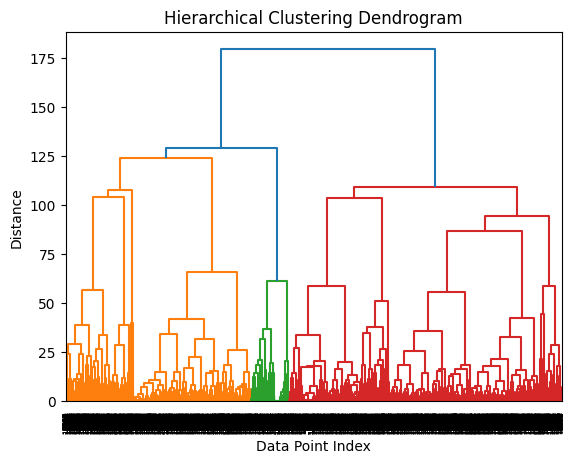

In [2]:
import pandas as pd
import numpy as np
Phishing_Data = pd.read_csv("C:\\Users\\alfre_g2qn6y7\\OneDrive\\Documents\\dataset_phishing.csv")
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
X = Phishing_Data[["google_index","page_rank","nb_hyperlinks","nb_www","web_traffic","domain_age","nb_qm","phish_hints","longest_word_path","nb_hyphens"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
linked = linkage(X_scaled, method='ward')
dendrogram(linked,
orientation='top', # Orientation of the dendrogram
labels=np.arange(len(X_scaled)).astype(str), # Labels for leaf nodes
distance_sort='descending', # Sort leaves by distance
show_leaf_counts=True) # Show the number of original observations in each leaf
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()





Based on this, the dataset forms 2 - 3 big clusters. Let's set a range for number of clusters (i.e. 2 - 10) and then calculate the silhoutte score of each cluster based on the agglomerative clustering algorithm. The linkeage parameter should also be varied. 

In [7]:
linkeage_type = ["ward", "complete", "average", "single"]
from sklearn.cluster import AgglomerativeClustering
for c in range(2,10):
    for l in linkeage_type:
        clustering = AgglomerativeClustering(n_clusters=c,linkage=l)
        cluster_labels = clustering.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        print(f"Silhouette Score for number of clusters {c} and linkeage type {l}: {silhouette_avg:.3f}")
        


Silhouette Score for number of clusters 2 and linkeage type ward: 0.176
Silhouette Score for number of clusters 2 and linkeage type complete: 0.792
Silhouette Score for number of clusters 2 and linkeage type average: 0.837
Silhouette Score for number of clusters 2 and linkeage type single: 0.886
Silhouette Score for number of clusters 3 and linkeage type ward: 0.191
Silhouette Score for number of clusters 3 and linkeage type complete: 0.789
Silhouette Score for number of clusters 3 and linkeage type average: 0.777
Silhouette Score for number of clusters 3 and linkeage type single: 0.758
Silhouette Score for number of clusters 4 and linkeage type ward: 0.150
Silhouette Score for number of clusters 4 and linkeage type complete: 0.740
Silhouette Score for number of clusters 4 and linkeage type average: 0.768
Silhouette Score for number of clusters 4 and linkeage type single: 0.758
Silhouette Score for number of clusters 5 and linkeage type ward: 0.162
Silhouette Score for number of cluste

In [13]:
clustering = AgglomerativeClustering(n_clusters=2,linkage="single")
cluster_labels = clustering.fit_predict(X_scaled)
Phishing_Data["Clusters"] = cluster_labels
Table = pd.crosstab(Phishing_Data["status"],Phishing_Data["Clusters"])
Table

Clusters,0,1
status,,
legitimate,5715,0
phishing,5714,1


There is one big cluster and a small cluster consisting of one point that is phishing. Not really a show. Let's try 9 clusters instead with ward linkeage.  

In [16]:
clustering = AgglomerativeClustering(n_clusters=9,linkage="ward")
cluster_labels = clustering.fit_predict(X_scaled)
Phishing_Data["Clusters"] = cluster_labels
Table = pd.crosstab(Phishing_Data["status"],Phishing_Data["Clusters"])
Table

Clusters,0,1,2,3,4,5,6,7,8
status,,,,,,,,,
legitimate,3173,282,200,479,167,0,6,543,865
phishing,301,2449,678,30,856,63,456,117,765


Text(0, 0.5, 'Number of URLs')

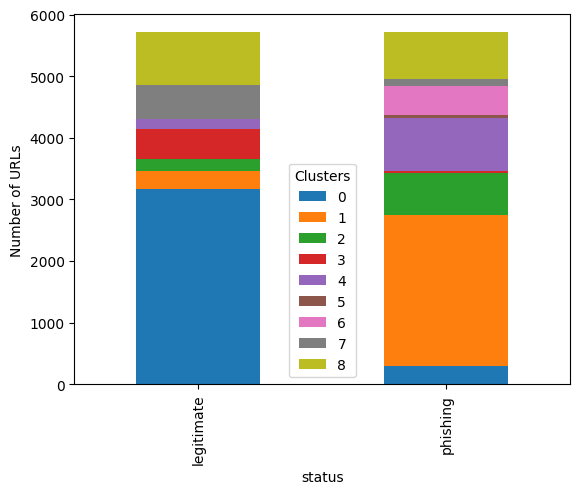

In [19]:
Table.plot(kind="bar",stacked=True)
plt.ylabel("Number of URLs")

It is evident that the legitimate and phishing urls are spread across all of the clusters with the former being particularly concentrated in cluster 0 and the latter being particularly concentrated in cluster 1. This seems to indicate separability. However, the silhoutte score of this arrangment is low (less than 0.2), indicating a significant degree of overlap between the clusters.

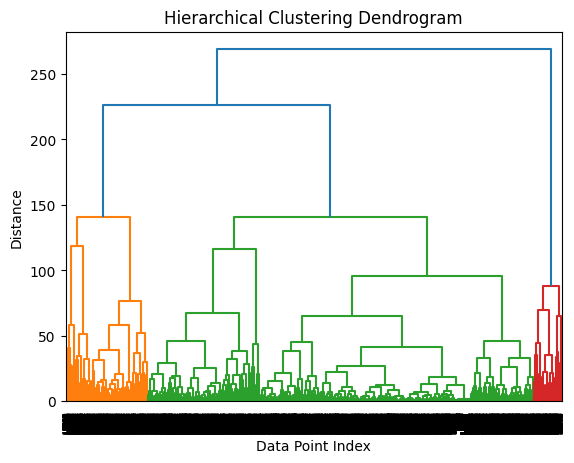

In [21]:
Email = pd.read_csv("C:\\Users\\alfre_g2qn6y7\\OneDrive\\Documents\\Phishing_Email.csv")
X = Email.drop(["Unnamed: 0","Email Text","Email Type"],axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
linked = linkage(X_scaled, method='ward')
dendrogram(linked,
orientation='top', # Orientation of the dendrogram
labels=np.arange(len(X_scaled)).astype(str), # Labels for leaf nodes
distance_sort='descending', # Sort leaves by distance
show_leaf_counts=True) # Show the number of original observations in each leaf
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()

In [22]:
linkeage_type = ["ward", "complete", "average", "single"]
from sklearn.cluster import AgglomerativeClustering
for c in range(2,10):
    for l in linkeage_type:
        clustering = AgglomerativeClustering(n_clusters=c,linkage=l)
        cluster_labels = clustering.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        print(f"Silhouette Score for number of clusters {c} and linkeage type {l}: {silhouette_avg:.3f}")

Silhouette Score for number of clusters 2 and linkeage type ward: 0.559
Silhouette Score for number of clusters 2 and linkeage type complete: 0.599
Silhouette Score for number of clusters 2 and linkeage type average: 0.676
Silhouette Score for number of clusters 2 and linkeage type single: 0.764
Silhouette Score for number of clusters 3 and linkeage type ward: 0.427
Silhouette Score for number of clusters 3 and linkeage type complete: 0.602
Silhouette Score for number of clusters 3 and linkeage type average: 0.660
Silhouette Score for number of clusters 3 and linkeage type single: 0.746
Silhouette Score for number of clusters 4 and linkeage type ward: 0.406
Silhouette Score for number of clusters 4 and linkeage type complete: 0.601
Silhouette Score for number of clusters 4 and linkeage type average: 0.654
Silhouette Score for number of clusters 4 and linkeage type single: 0.746
Silhouette Score for number of clusters 5 and linkeage type ward: 0.240
Silhouette Score for number of cluste

It is interesting to note how silhoutte score decreases with number of clusters for ward and complete linkage but for the others, there is more of a complex trend. Let's try the parameters that gave us the highest silhoutte score (single linkage, 2 clusters).

In [30]:
clustering = AgglomerativeClustering(n_clusters=2,linkage="single")
cluster_labels = clustering.fit_predict(X_scaled)
Email["Clusters"] = cluster_labels
Table = pd.crosstab(Email["Email Type"],Email["Clusters"])
Table

Clusters,0,1
Email Type,,
Phishing Email,6977,1
Safe Email,10738,0


Basically, there is just one big cluster and a small cluster that contains one phishing email. Let's try something with more clusters but that still gives us a silhoutte score that is relatively high (approximately 0.6). 

In [33]:
clustering = AgglomerativeClustering(n_clusters=5,linkage="complete")
cluster_labels = clustering.fit_predict(X_scaled)
Email["Clusters"] = cluster_labels
Table = pd.crosstab(Email["Email Type"],Email["Clusters"])
Table

Clusters,0,1,2,3,4
Email Type,,,,,
Phishing Email,6688,206,59,19,6
Safe Email,10248,334,96,51,9


Text(0, 0.5, 'Number of URLs')

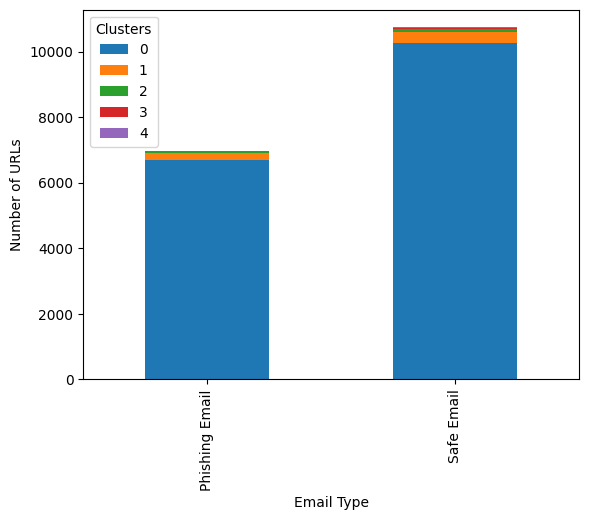

In [34]:
Table.plot(kind="bar",stacked=True)
plt.ylabel("Number of URLs")

The bulk of emails, phishing and safe, are in cluster 0, indicating next to no separability. 

In [1]:
import pandas as pd
import numpy as np
URL = pd.read_csv("C:\\Users\\alfre_g2qn6y7\\OneDrive\\Documents\\web-page-phishing.csv")
X = URL[["url_length","n_slash","n_dots","n_hypens","n_questionmark"]]
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.cluster import AgglomerativeClustering
for c in range(2,10):
        clustering = AgglomerativeClustering(n_clusters=c)
        cluster_labels = clustering.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        print(f"Silhouette Score for number of clusters {c}: {silhouette_avg:.3f}")




MemoryError: unable to allocate array data.

Dataset is clearly too large even with reduced feature space consisting of more than 90% of feature importance (based on Week 9 Juypter NoteBook). No insights can be drawn. 